In [106]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Text
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

#### Data importing and exploration

In [54]:
## importing data
df = pd.read_csv(r'Data\train.csv')

In [55]:
df.sample(frac=1)

,id,keyword,location,text,target
3836,5459,first%20responders,"Franklin, TN near Nashville",After shooting event at the theater @Starbucks...,1
1647,2377,collapsed,"Kingston, Jamaica",Another entity forced to close in Montego Bay ...,1
4661,6627,inundated,Pontefract UK,@LEDofficial1 As you can imagine we're inundat...,1
217,309,annihilated,"Greater Manchester, UK",@ACarewornHeart Have a good un fella sorry I w...,0
5209,7439,obliterated,leyland,Very glad that you got obliterated in X Men Fi...,0
...,...,...,...,...,...
7526,10764,wreckage,"Dublin City, Ireland",Wreckage 'Conclusively Confirmed' as From MH37...,1
3070,4405,electrocute,NaN,when you got an extension cord that extends fr...,0
7249,10379,weapons,NaN,@Glosblue66 no idea what this means. Look at o...,0
5355,7643,pandemonium,California,Truly a scene of chaos unprecedented in frenzy...,1


In [56]:
df.sample(frac=1)

,id,keyword,location,text,target
248,353,annihilation,Subconscious LA,World Annihilation vs Self Transformation http...,0
5810,8292,rubble,"Columbus, Georgia",'Refuse to let my life be reduced to rubble. W...,0
6893,9881,traumatised,NaN,@malabamiandsons she's proper traumatised that...,0
3673,5228,fatality,"Fort Wayne, IN",Kosciusko police investigating pedestrian fata...,1
7213,10332,weapon,Denver Colorado. Fun Times,Lol\nLook how tough some people talk that live...,1
...,...,...,...,...,...
937,1354,blown%20up,Nowhere Islands/Smash Manor,@TheBoyOfMasks 'Thanks again for letting me st...,0
2649,3803,detonate,Paname City,Apollo Brown - Detonate (ft. M.O.P.) http://t....,0
518,748,avalanche,"Loughton, Essex, UK",I liked a @YouTube video http://t.co/TNXQuOr1w...,0
6435,9208,suicide%20bombing,NaN,@JewhadiTM It is almost amazing to think someo...,1


In [57]:
# Dropping ID and location columns
df.drop(columns=['id', 'location'], inplace=True)

In [58]:
# Removing duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

72


In [59]:
df.sample(frac=1)

,keyword,text,target
7371,windstorm,#NowPlaying School Of Seven Bells - Windstorm ...,0
1612,collapse,Timestack' Photos Collapse Entire Sunsets Into...,0
3103,electrocuted,I got electrocuted this morning how is your da...,0
4426,hostage,quoted here--&gt;CNN: Purported ISIS video thr...,1
3317,evacuate,quick shut down the show take the stage down e...,0
...,...,...,...
5359,panic,@brokenscnecal I just though about panic! at t...,0
4904,massacre,@gigagil IOF murdered over 513 Palestinian chi...,1
4818,mass%20murder,@DoctorDryadma mass murder here we come,1
938,blown%20up,LONER DIARIES.\n\nThe patterns on the sand\nM...,0


In [60]:
# Dropping null values
print(df.isna().sum())
df.dropna(inplace=True)

keyword    61
text        0
target      0
dtype: int64


In [61]:
df.sample(frac=1)

,keyword,text,target
6085,sinking,Do you feel like you are sinking in low self-i...,0
3152,emergency,Myanmar floods: Childfund https://t.co/pQHQ4Jn...,1
5189,obliterated,Me- Don't bother calling or texting me because...,0
6240,snowstorm,Sassy city girl country hunk stranded in Smoky...,0
5002,military,@UniversityofLaw For the people who died in Hu...,1
...,...,...,...
718,bleeding,@JaydenNotJared I can't help it. Hope you're o...,0
6322,stretcher,How to restore vinyl siding and make it look n...,0
5343,pandemonium,@Dr_Baseball41 @GrantTamane8 @DrewWTaylor @Dto...,0
3043,earthquake,@AGeekyFangirl14 's things she looks in a sign...,0


#### Data and text preprocessing

In [62]:
# Label encoding keyword column

le = LabelEncoder()
df['keyword'] = le.fit_transform(df['keyword'])
df.sample(frac=1)

,keyword,text,target
5924,172,I ran with earbuds in which I now realize mean...,0
844,23,SEAN END CAREER sG Blizzard vs KNOCKOUT ... ht...,0
3470,100,Another Mechanical Mod Explosion: Man Injured ...,1
1486,42,Oh my god thatÛªs the biggest #gbbo catastrop...,0
203,4,Twelve feared killed in Pakistani air ambulanc...,1
...,...,...,...
870,24,Ain't no hoe in my blood,1
6970,203,@Kamunt Holy crap it's been forever since I sa...,0
5797,168,RT : Why Sweden Isn't Venezuela: There have be...,1
1061,30,the_af comments on 'New evidence of Japan's ef...,1


In [63]:
df

,keyword,text,target
31,0,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,0,We always try to bring the heavy. #metal #RT h...,0
33,0,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,0,Crying out for more! Set me ablaze,0
35,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...
7578,220,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,220,Three days off from work and they've pretty mu...,0
7580,220,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,220,@engineshed Great atmosphere at the British Li...,0


In [64]:
# Reshuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)
df

,keyword,text,target
0,58,@morehouse64 It appears our #Govt has lost an ...,0
1,86,6 Things Getting Caught in a Dust Storm &amp; ...,0
2,116,#HeartDisease U.S. Forest Service says spendin...,1
3,14,PATRICK ROY 1998-99 UPPER DECK SPX #171 FINITE...,0
4,159,#hot Reddit's new content policy goes into ef...,0
...,...,...,...
7475,84,Toddler drowned in bath after mum left room to...,1
7476,153,Families to sue over Legionnaires: More than 4...,1
7477,88,@ZXAThetis 'Are you okay?! I electrocute you T...,0
7478,174,Gets on battlefield 3 screams into Mic at cunts,0


In [65]:
# Preprocessing text

def text_preprocess(text):
    # Fixing contractions
    text = contractions.fix(text)
    
    # Removing non-alphabetical characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    
    # Converting to lowercase
    text = text.lower()
    
    # Removing stopwords
    s_words = stopwords.words('english')
    s_words.remove('not')
    text = text.split()
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text if word not in s_words])
    
    
    return text

In [66]:
df['text'] = df['text'].apply(text_preprocess)

In [67]:
df_raw = df.copy()

In [68]:
df.sample(frac=1)

,keyword,text,target
5017,204,bed eat twister drink cup tea not dunk twister...,0
5953,158,reddit quarantin offens content httptcounnxvqc,0
949,54,wow crush edw bluejay,0
7351,109,day emerg servic display meet brave polic fire...,1
6031,117,hail new caesar httptcogzmoblsjxu httptcocgtqfkur,0
...,...,...,...
2817,184,whvholst leashless structur problem rather fai...,0
6597,37,bar method integr fat burn format interv train...,0
3538,165,migrant rescu boat capsiz libya httptcopmggavtokp,1
898,162,latest home raze northern california wildfir a...,1


#### Word2vec

In [79]:
# Training Word2Vec model
w2v_model = Word2Vec(sentences=df['text'].to_list(), vector_size=100, window=5, min_count=1, workers=4)

In [51]:
df

,keyword,text,target
0,124,"[anoth, mac, vuln, httpstcooxxrnabun]",0
1,217,"[driver, ram, car, isra, soldier, wound, milit...",1
2,217,"[wound, kiss, someon, not, see, disast, soul, ...",0
3,24,"[not, big, stab, deep, stab, like, blood, everwh]",1
4,125,"[hijackerturnedsattutor, evad, author, three, ...",1
...,...,...,...
7475,129,"[freegeezi, stay, houston]",0
7476,141,"[year, sikh, templ, massacr, hateviol, prevent...",1
7477,98,[explod],0
7478,174,"[everi, bt, song, jimin, scream]",0


In [86]:
# Returning the mean Numpy arrays present in Word2vec vocab of our corpus
def vectorize(text, model):
    # Remove words not in vocab
    text = [word for word in text if word in model.wv.key_to_index]
    if len(text) == 0: # if no words in text are in vocab
        return np.zeros(model.vector_size)
    return np.mean(model.wv[text], axis=0)

In [87]:
# Applting function to tokenized text
df['text'] = df['text'].apply(lambda x: vectorize(x, w2v_model).astype('float'))

In [88]:
df

,keyword,text,target
0,58,"[-0.014470353722572327, 0.020746810361742973, ...",0
1,86,"[-0.06141035258769989, 0.08180741220712662, 0....",0
2,116,"[-0.048417601734399796, 0.06692159175872803, 0...",1
3,14,"[-0.00687912292778492, 0.013419880531728268, 0...",0
4,159,"[-0.040473759174346924, 0.05771592631936073, 0...",0
...,...,...,...
7475,84,"[-0.012363090179860592, 0.019773803651332855, ...",1
7476,153,"[-0.046000704169273376, 0.04915770888328552, 0...",1
7477,88,"[-0.02621028758585453, 0.02714223600924015, 0....",0
7478,174,"[-0.05445180460810661, 0.07094542682170868, 0....",0


In [89]:
df['text']

0       [-0.014470353722572327, 0.020746810361742973, ...
1       [-0.06141035258769989, 0.08180741220712662, 0....
2       [-0.048417601734399796, 0.06692159175872803, 0...
3       [-0.00687912292778492, 0.013419880531728268, 0...
4       [-0.040473759174346924, 0.05771592631936073, 0...
                              ...                        
7475    [-0.012363090179860592, 0.019773803651332855, ...
7476    [-0.046000704169273376, 0.04915770888328552, 0...
7477    [-0.02621028758585453, 0.02714223600924015, 0....
7478    [-0.05445180460810661, 0.07094542682170868, 0....
7479    [-0.03684353083372116, 0.04889021813869476, 0....
Name: text, Length: 7480, dtype: object

In [90]:
# Output Word2vec preprocessed data as CSV
df.to_csv('df-w2v.csv', index=False)

#### ML Model

In [23]:
X = np.hstack((df['keyword'].values.reshape(-1,1), np.vstack(df['text'].values))) # Horizonatally stacking the int column as a 1d array along with the vertical stack of the text multi-dimensional array 
y = df['target'].values # Converting target column into np array

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train) # Training the model
y_pred = clf.predict(X_test) # Getting predictions
acc = accuracy_score(y_test, y_pred)
print('Acc:', acc)

Acc: 0.608957219251337


In [41]:
# Initializing classifiers
classifiers={
    'Logistic regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

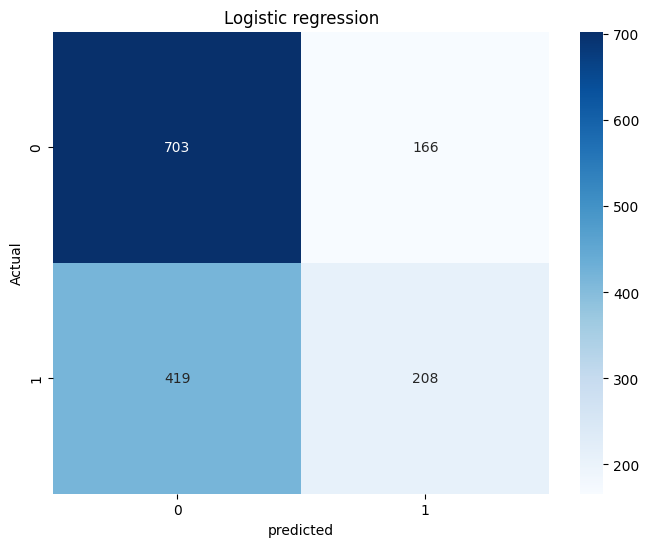

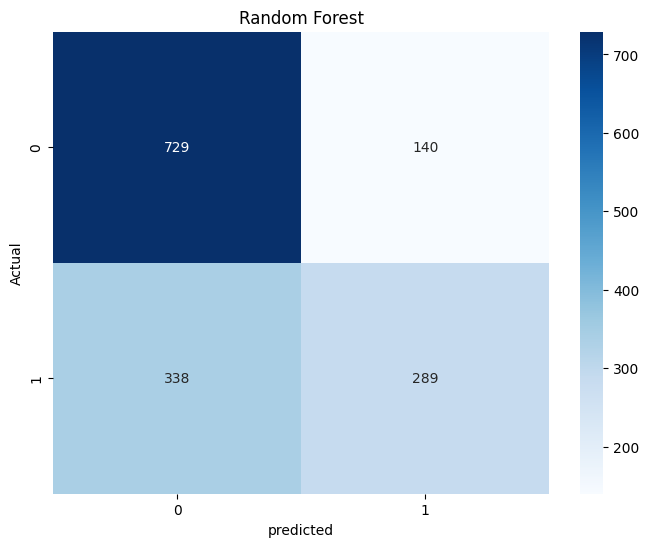

In [42]:
# Training and getting evaluation of each classifier
metrics_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
for name, clf in classifiers.items():
    # Training model and getting predictions
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluating
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    
    # Storing metrics
    metrics_df = metrics_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall, 
        'F1-score': F1_score
    }, ignore_index=True)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}')
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()


In [43]:
metrics_df

,Classifier,Accuracy,Precision,Recall,F1-score
0,Logistic regression,0.608957,0.55615,0.331738,0.415584
1,Random Forest,0.680481,0.67366,0.460925,0.547348


#### Trying with more wide range of Classifiers

In [45]:
# Initializing classifiers
classifiers={
    'Logistic regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-nearest neighbors': KNeighborsClassifier(),
}

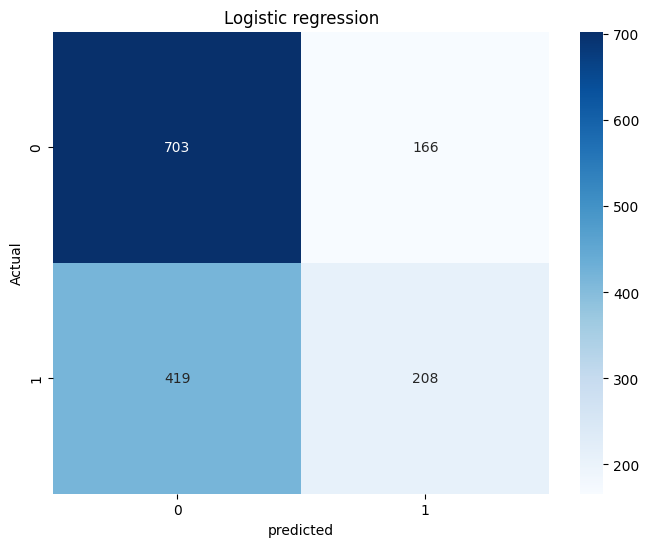

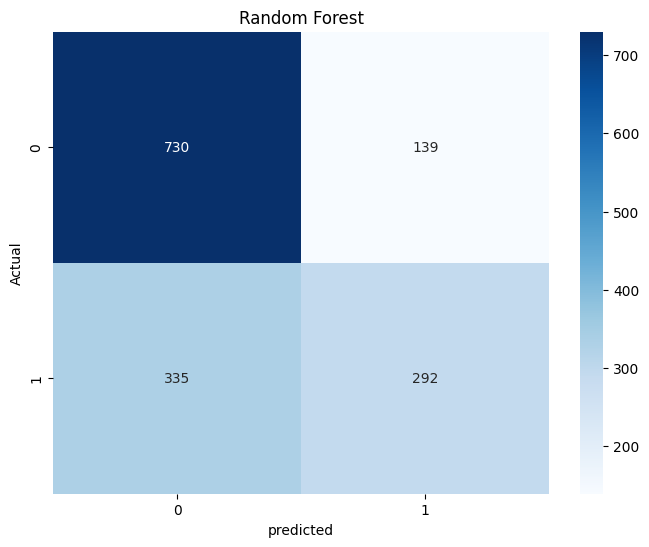

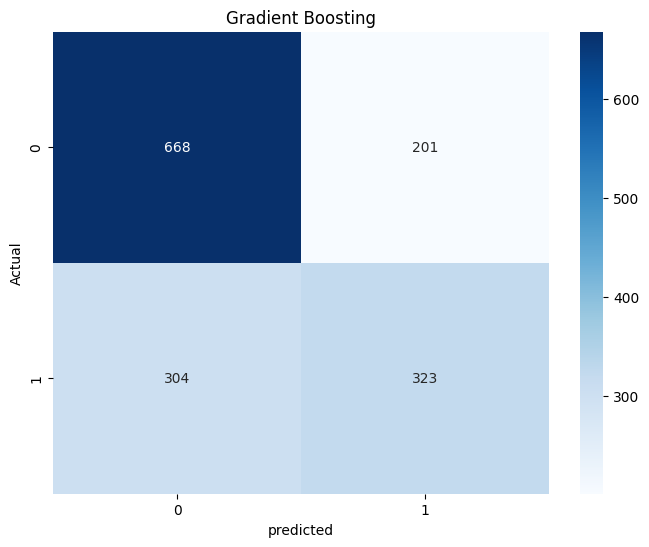

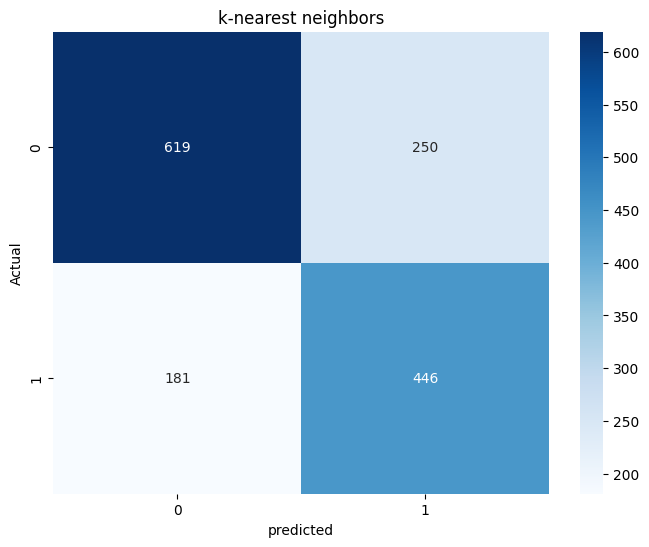

,Classifier,Accuracy,Precision,Recall,F1-score
0,Logistic regression,0.608957,0.556150,0.331738,0.415584
1,Random Forest,0.683155,0.677494,0.465710,0.551985
2,Gradient Boosting,0.662433,0.616412,0.515152,0.561251
3,k-nearest neighbors,0.711898,0.640805,0.711324,0.674225


In [46]:
# Training and getting evaluation of each classifier
for name, clf in classifiers.items():
    # Training model and getting predictions
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluating
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    
    # Storing metrics
    metrics_df = metrics_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall, 
        'F1-score': F1_score
    }, ignore_index=True)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}')
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()

metrics_df

#### Further models

In [49]:
classifiers={
    'XGB': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier()
}

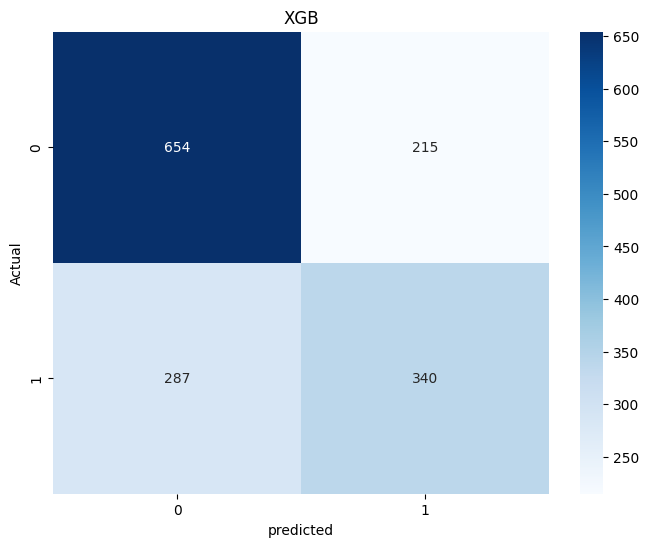

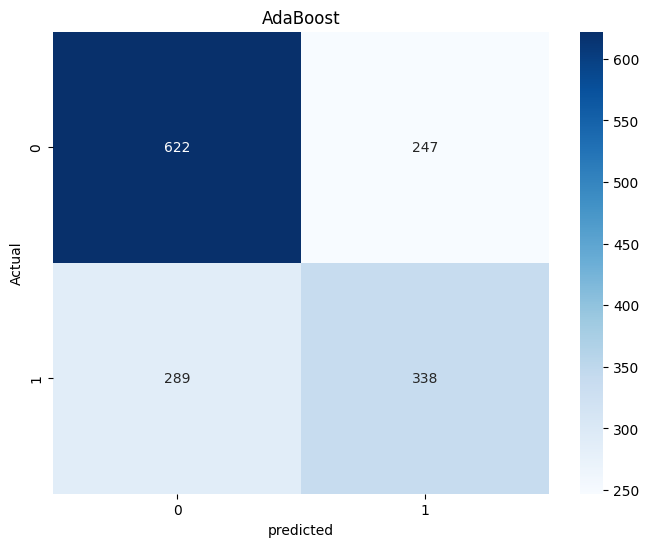

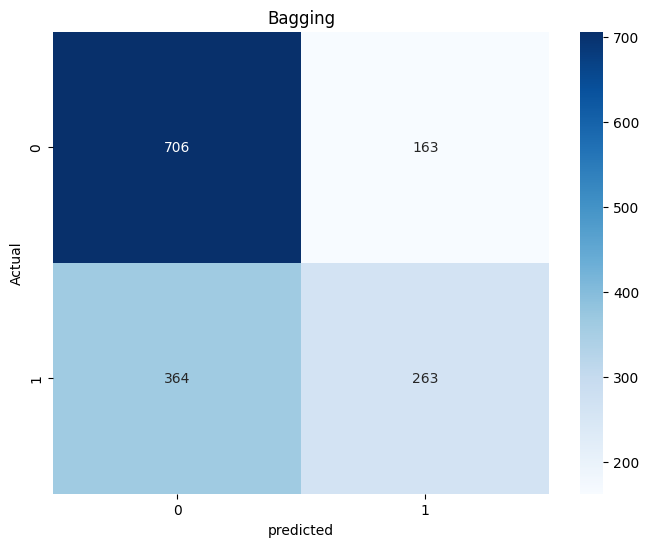

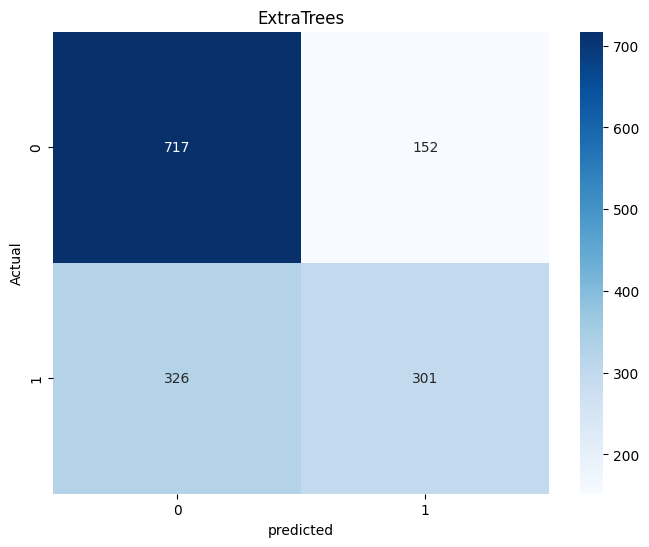

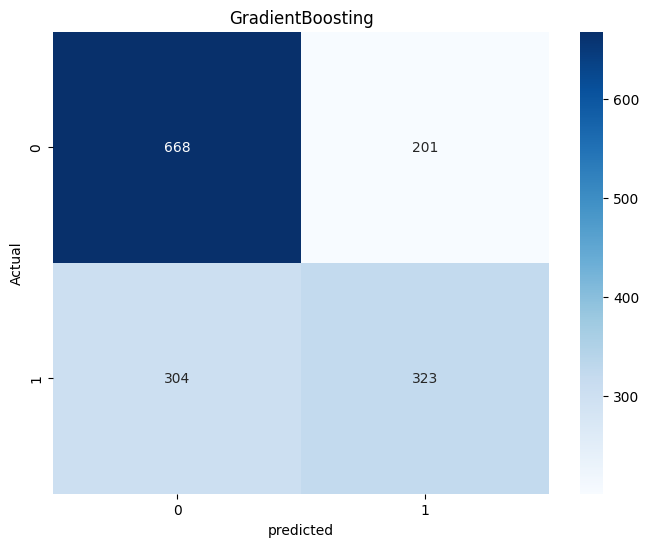

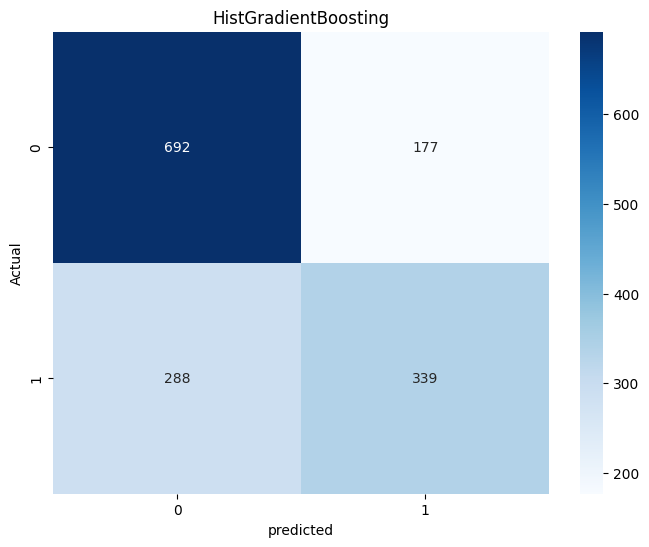

,Classifier,Accuracy,Precision,Recall,F1-score
0,XGB,0.664439,0.612613,0.542265,0.575296
1,AdaBoost,0.641711,0.577778,0.539075,0.557756
2,Bagging,0.647727,0.617371,0.419458,0.499525
3,ExtraTrees,0.680481,0.664459,0.480064,0.557407
4,GradientBoosting,0.662433,0.616412,0.515152,0.561251
5,HistGradientBoosting,0.689171,0.656977,0.540670,0.593176


In [50]:
# Training and getting evaluation of each classifier
for name, clf in classifiers.items():
    # Training model and getting predictions
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluating
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    
    # Storing metrics
    metrics_df = metrics_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall, 
        'F1-score': F1_score
    }, ignore_index=True)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}')
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()

metrics_df

### Trying with Tf-idf

In [54]:
# Retreiving the original Dataframe
df = df_raw.copy()

In [65]:
tfidf = TfidfVectorizer(max_features=3000) # Initializing Tf-idf
text = tfidf.fit_transform(df['text']).toarray() # Applying it to the text column
X = np.concatenate([text, df[['keyword']]], axis=1)
y = df['target']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [68]:
# Initializing classifiers
classifiers={
    'Logistic regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Logistic regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-nearest neighbors': KNeighborsClassifier(),
    'XGB': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier()
}

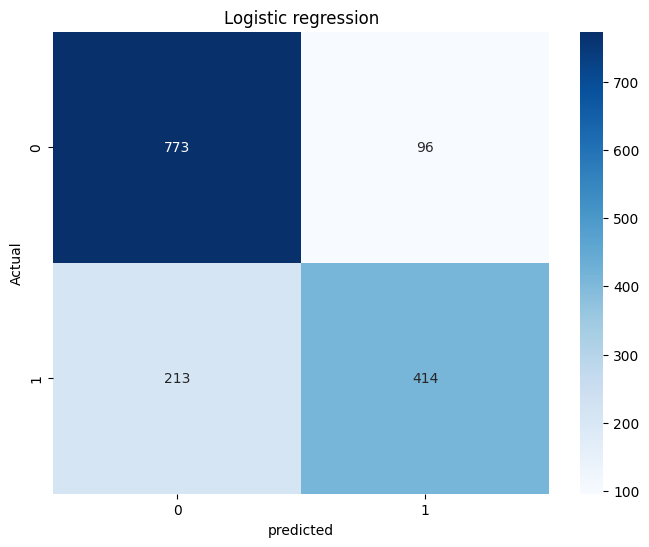

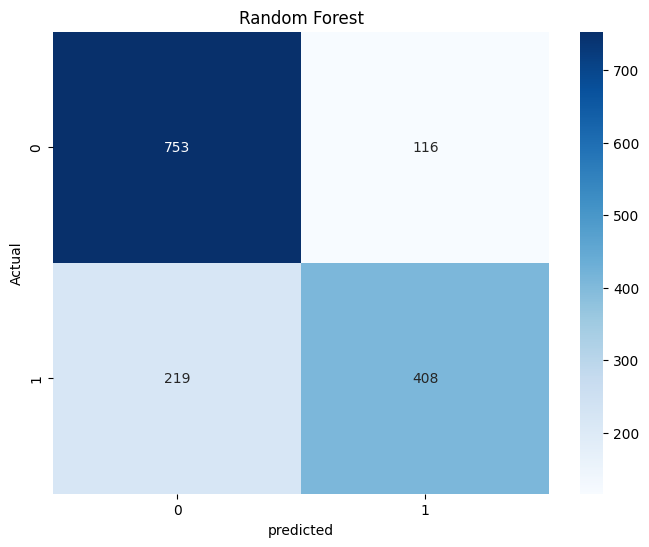

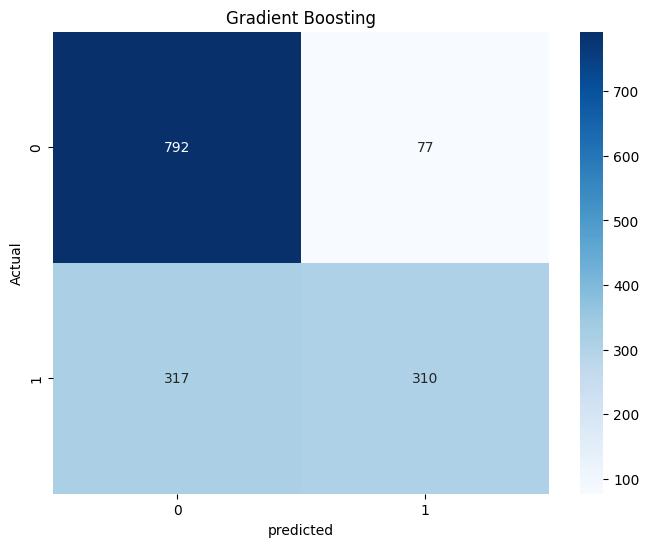

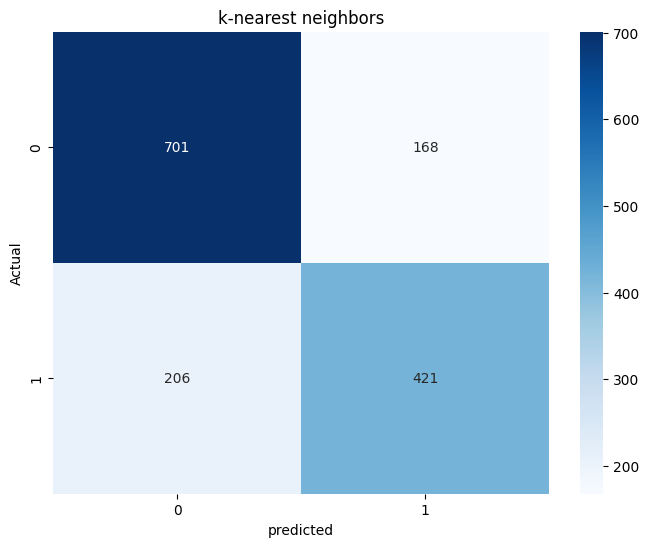

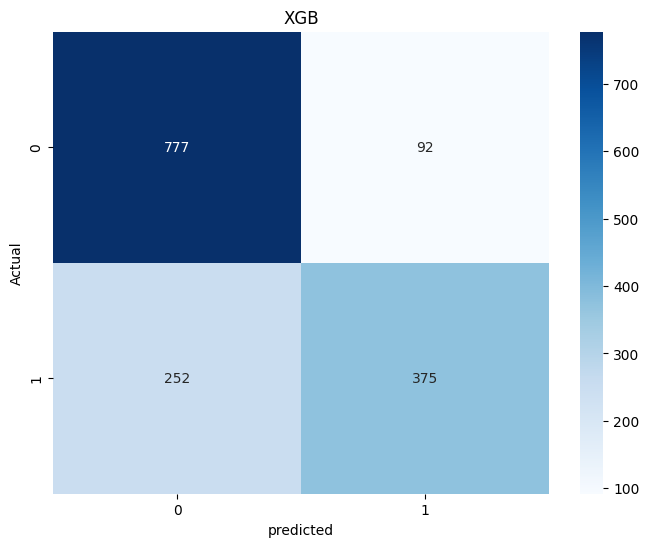

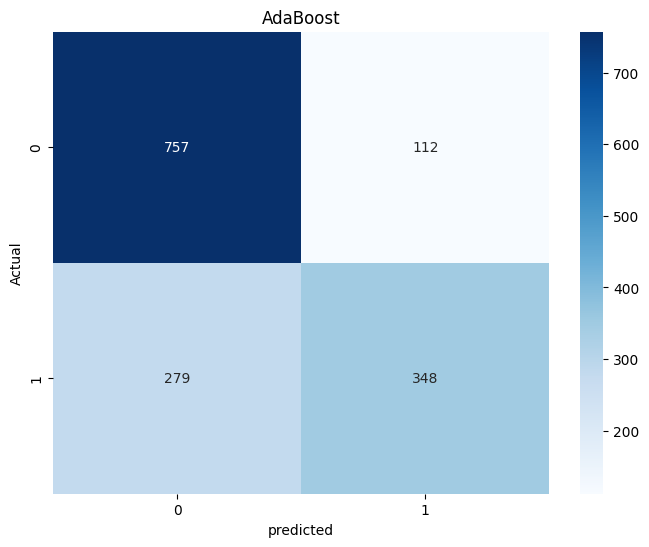

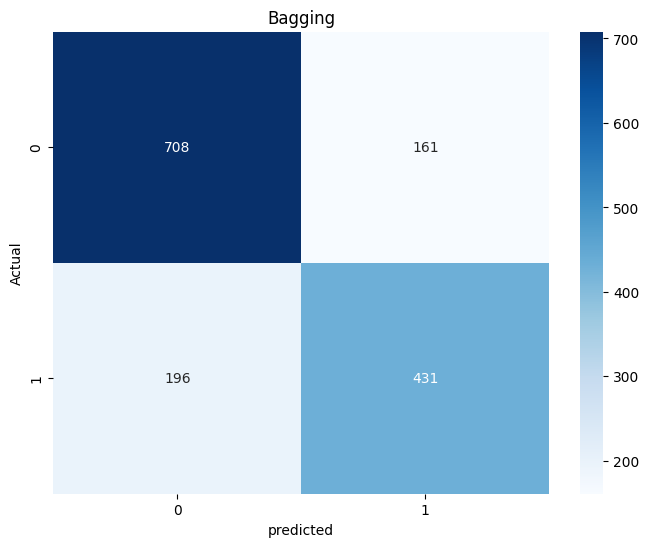

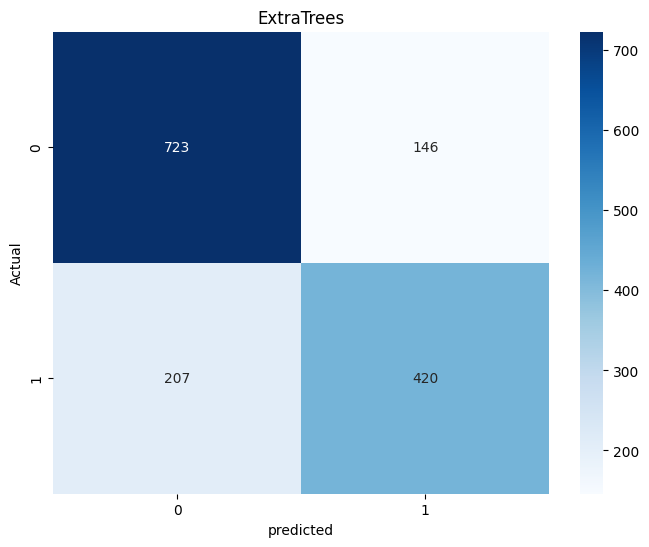

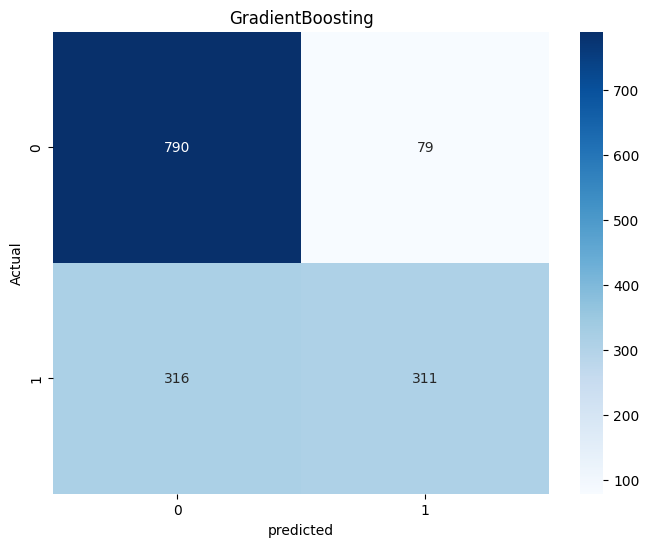

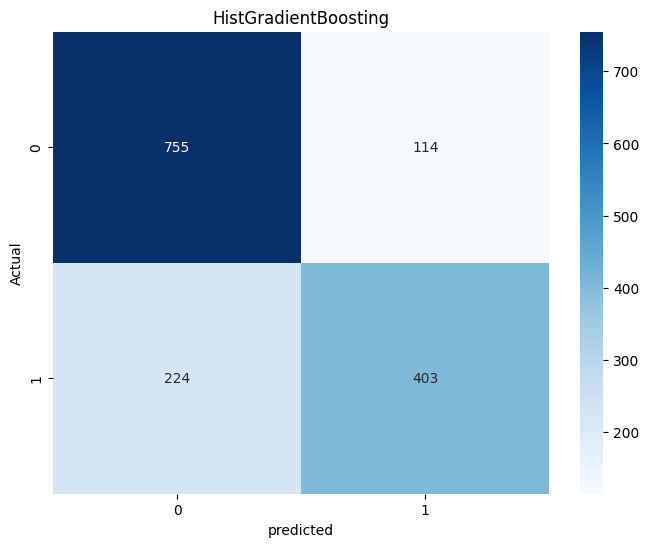

,Classifier,Accuracy,Precision,Recall,F1-score
0,Logistic regression,0.793449,0.811765,0.660287,0.728232
1,Random Forest,0.776070,0.778626,0.650718,0.708949
2,Gradient Boosting,0.736631,0.801034,0.494418,0.611440
3,k-nearest neighbors,0.750000,0.714771,0.671451,0.692434
4,XGB,0.770053,0.802998,0.598086,0.685558
5,AdaBoost,0.738636,0.756522,0.555024,0.640294
6,Bagging,0.761364,0.728041,0.687400,0.707137
7,ExtraTrees,0.764037,0.742049,0.669856,0.704107
8,GradientBoosting,0.735963,0.797436,0.496013,0.611603
9,HistGradientBoosting,0.774064,0.779497,0.642743,0.704545


In [70]:
# Training and getting evaluation of each classifier
tfidf_metrics_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
for name, clf in classifiers.items():
    # Training model and getting predictions
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluating
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    
    # Storing metrics
    tfidf_metrics_df = tfidf_metrics_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall, 
        'F1-score': F1_score
    }, ignore_index=True)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}')
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()

tfidf_metrics_df

##### Bagging classifier achieves the best performance

In [80]:
top_classifier = {
    'Bagging': BaggingClassifier()
}

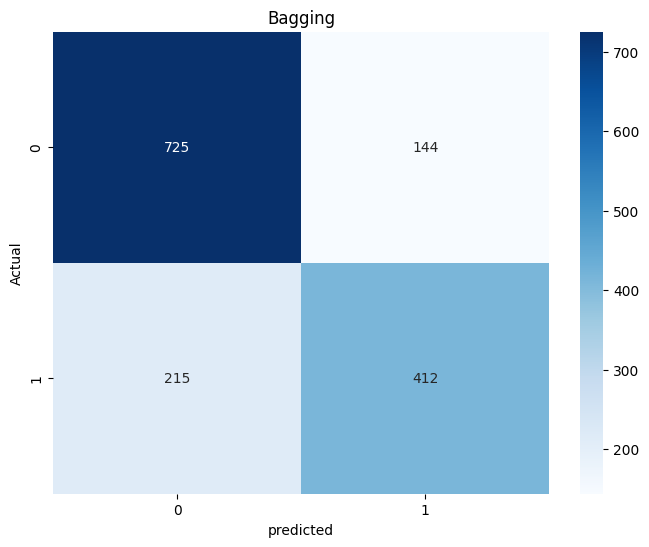

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       869
           1       0.74      0.66      0.70       627

    accuracy                           0.76      1496
   macro avg       0.76      0.75      0.75      1496
weighted avg       0.76      0.76      0.76      1496



,Classifier,Accuracy,Precision,Recall,F1-score
0,Bagging,0.760027,0.741007,0.657097,0.696534


In [82]:
# Training and getting evaluation of each classifier
best_metrics_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
for name, clf in top_classifier.items():
    # Training model and getting predictions
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluating
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1_score = f1_score(y_test, y_pred)
    
    # Storing metrics
    best_metrics_df = best_metrics_df.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall, 
        'F1-score': F1_score
    }, ignore_index=True)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}')
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification report
    print(classification_report(y_test, y_pred))

best_metrics_df

#### Fine tuning best classifiers in Word2vec (K-nearest neighbour)

In [17]:
# Getting data ready
# Word2vec dataframe
df_w2v = df.copy()
df_w2v

,keyword,text,target
0,80,disast avert polic kill gunman hoax devic atci...,0
1,203,anyway old ladi went someth ask alon come tsun...,0
2,107,httptcoinkuvdntx auction shoe retro fire red h...,0
3,72,watch desol smaug spanish hell drug,0
4,151,win kerri obliter,0
...,...,...,...
7475,80,cncpt solelink disast cannot say surpris,0
7476,141,eileenmfl seriou,0
7477,171,watch airport get swallow sandstorm minut http...,1
7478,30,came idea fragranc concept bath bomb call bloo...,1


In [19]:
# Downloading pre-trained model
from gensim.models import KeyedVectors
model_path = r"E:\10k\NLP\GoogleNews-vectors-negative300.bin.gz"
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [20]:
# Returning the mean Numpy arrays present in Word2vec vocab of our corpus
def vectorize(text, word2vec_model):
    text = [word for word in text if word in word2vec_model.key_to_index]
    return np.mean(word2vec_model[text], axis=0)

In [21]:
# Converting text column into np arrays
for i in range(len(df_w2v['text'].values)):
    # Conveting each Text column into Word2vec np array
    df_w2v['text'][i] = vectorize(df_w2v['text'][i], w2v_model)

In [22]:
df_w2v

,keyword,text,target
0,80,"[-0.15726726, 0.100097656, 0.0041097007, 0.143...",0
1,203,"[-0.17158447, 0.1191211, -0.03854248, 0.137724...",0
2,107,"[-0.1952526, 0.107345015, -0.019024884, 0.1449...",0
3,72,"[-0.2002473, 0.14754231, -0.001953125, 0.10914...",0
4,151,"[-0.17711182, 0.08239746, -0.01574707, 0.17106...",0
...,...,...,...
7475,80,"[-0.17824554, 0.099823, -0.006061554, 0.151557...",0
7476,141,"[-0.14512126, 0.120629884, 0.016691081, 0.1178...",0
7477,171,"[-0.22958714, 0.13936225, -0.07683784, 0.14194...",1
7478,30,"[-0.17122164, 0.117463544, -0.0017783425, 0.14...",1


In [23]:
df_w2v['text']

0       [-0.15726726, 0.100097656, 0.0041097007, 0.143...
1       [-0.17158447, 0.1191211, -0.03854248, 0.137724...
2       [-0.1952526, 0.107345015, -0.019024884, 0.1449...
3       [-0.2002473, 0.14754231, -0.001953125, 0.10914...
4       [-0.17711182, 0.08239746, -0.01574707, 0.17106...
                              ...                        
7475    [-0.17824554, 0.099823, -0.006061554, 0.151557...
7476    [-0.14512126, 0.120629884, 0.016691081, 0.1178...
7477    [-0.22958714, 0.13936225, -0.07683784, 0.14194...
7478    [-0.17122164, 0.117463544, -0.0017783425, 0.14...
7479    [-0.19110858, 0.11867676, -0.03600605, 0.14776...
Name: text, Length: 7480, dtype: object

In [26]:
X = np.hstack((df_w2v['keyword'].values.reshape(-1,1), np.vstack(df_w2v['text'].values))) # Horizonatally stacking the int column as a 1d array along with the vertical stack of the text multi-dimensional array 
y = df_w2v['target'].values # Converting target column into np array

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

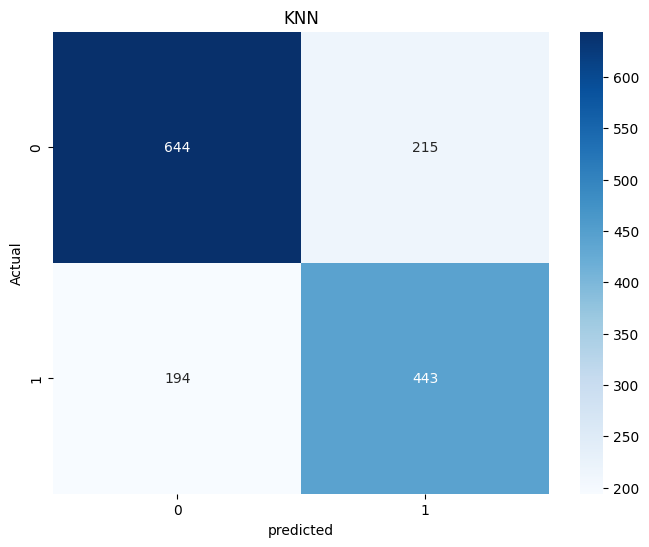

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       859
           1       0.67      0.70      0.68       637

    accuracy                           0.73      1496
   macro avg       0.72      0.72      0.72      1496
weighted avg       0.73      0.73      0.73      1496



,Classifier,Accuracy,Precision,Recall,F1-score
0,KNN,0.726604,0.673252,0.695447,0.68417


In [35]:
# Working on the model
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_ # Getting best classifier
y_pred_knn = best_knn.predict(X_test) # Getting predictions

# Performance evaluation
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
F1_score = f1_score(y_test, y_pred_knn)

# Storing metrics
knn_metrics = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
knn_metrics = knn_metrics.append({
    'Classifier': 'KNN',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall, 
    'F1-score': F1_score
}, ignore_index=True)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('KNN')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_knn))

knn_metrics
